In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 
               1, 3, 3, 1, 2]], dtype = np.float64)
y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype = np.float64)

In [8]:
def calc_std_feat(x):
    res = (x - x.mean()) / x.std()
    return res

In [9]:
X_st = X.copy()
X_st[2, :] = calc_std_feat(X[2, :])

In [10]:
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [ 1.        ,  1.        ,  2.        ,  1.        ,  3.        ,
         0.        ,  5.        , 10.        ,  1.        ,  2.        ],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [ 1.        ,  1.        ,  2.        ,  1.        ,  2.        ,
         1.        ,  3.        ,  3.        ,  1.        ,  2.        ]])

## 1*. Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.  

In [11]:
# Добавим очень маленькое значение в логарифм, чтобы он никогда не обнулялся
def calc_logloss(y, y_pred):
    z = 1e-5
    err = - np.mean(y * np.log(y_pred + z) + (1.0 - y) * np.log(1.0 - y_pred + z))
    return err

In [12]:
# Пример применения
y1 = np.array([1, 0, 1])
y_pred1 = np.array([0.9, 0.1, 0])
calc_logloss(y1, y_pred1)

3.9078747580623716

## 2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.

In [49]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

In [73]:
# Logistic Regression
def eval_model(X, y, iterations, alpha=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    err_lst = []
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        err_lst.append(err)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T))
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W, err_lst

In [74]:
W, err_lst = eval_model(X_st, y, iterations=100000, alpha=1e-2)

10000 [-2.77079473 -0.99580928  0.56650766  3.2676589 ] 0.40581408025431676
20000 [-4.59029892 -1.03598171 -0.13800874  4.44457898] 0.35330646857191583
30000 [-5.90941861 -1.08771192 -0.62104909  5.36111049] 0.32499058711925344
40000 [-6.96073579 -1.14368109 -0.98673759  6.13012867] 0.3066052636070803
50000 [-7.85441079 -1.19932069 -1.28729658  6.80520914] 0.2931074865305321
60000 [-8.64676587 -1.25343997 -1.54768639  7.41639955] 0.28237746963896115
70000 [-9.369139   -1.30582517 -1.78113764  7.98151615] 0.27338866610554136
80000 [-10.04023916  -1.35653126  -1.99529773   8.51167559] 0.2655872711487036
90000 [-10.67189098  -1.40567714  -2.19489264   9.01414008] 0.25864859172679255
100000 [-11.27192801  -1.45338517  -2.38300258   9.49385018] 0.25236925964026347


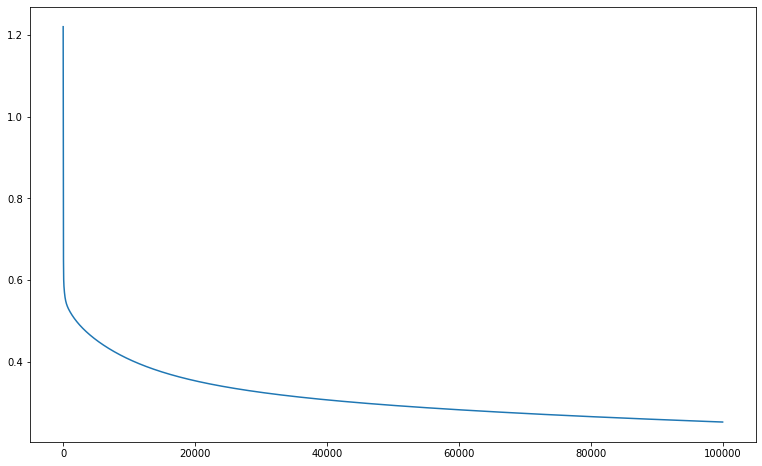

In [34]:
# log loss можно уменьшать до бесконечности. Он стремится к нулю при увеличении итераций, но модель при этом переобучается
plt.figure(figsize=(13, 8))
plt.plot(err_lst)

plt.show()

## 3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).

#### Примем за минимальное значение вероятности для класса 1 равным 0.5

In [97]:
#добавил еще на вход 2 переменные:
#k - для указания минимального значения
#cls - для указания, какой класс возвращаем. По умолчанию, возвращаем вероятности всех классов

def calc_pred_proba(W, X, k = 0.5, cls = 2):
    X_st = X.copy()
    X_st[2, :] = calc_std_feat(X[2, :])
    y_pred_proba = 1/(1 + np.exp(-np.dot(W, X_st)))
    if cls == 0:
        return y_pred_proba[np.where(y_pred_proba <= k)]
    elif cls == 1:
        return y_pred_proba[np.where(y_pred_proba > k)]
    else:
        return y_pred_proba

In [99]:
calc_pred_proba(W, X, cls = 1)

array([0.99730794, 0.73521642, 0.99936586, 0.99086206])

## 4. Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).

In [102]:
def calc_pred(W, X, k = 0.5):
    y_pred_proba = calc_pred_proba(W, X, k)
    return np.logical_and(y_pred_proba > k, y_pred_proba <= 1).astype(int)

In [103]:
y_pred = calc_pred(W, X)
y_pred

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 1])

## 5. Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.

In [144]:
def marix_value(y, y_pred):
    """
    Матрица ошибок
    """
    y1 = y[np.where(y_pred == 1)].astype(int)
    y2 = y[np.where(y_pred == 0)].astype(int)
    
    TP = len(np.where(y1 == 1)[0])
    FP = len(np.where(y1 == 0)[0])
    TN = len(np.where(y2 == 0)[0])
    FN = len(np.where(y2 == 1)[0])
    
    return TP, TN, FP, FN

In [149]:
marix_value(y, y_pred)

(4, 5, 0, 1)

In [148]:
def accuracy(y, y_pred):
    """
    Accuracy
    """
    TP, TN, FP, FN = marix_value(y, y_pred)
    return (TP + TN) / (TP + TN + FP + FN)

In [150]:
accuracy(y, y_pred)

0.9

In [151]:
def precision(y, y_pred):
    """
    Точность
    """
    TP, TN, FP, FN = marix_value(y, y_pred)
    return TP / (TP + FP)

In [152]:
def recall(y, y_pred):
    """
    Полнота
    """
    TP, TN, FP, FN = marix_value(y, y_pred)
    return TP / (TP + FN)

In [153]:
precision(y, y_pred)

1.0

In [154]:
recall(y, y_pred)

0.8

In [155]:
def f1_score(y, y_pred):
    """
    F1 score
    """
    p = precision(y, y_pred)
    r = recall(y, y_pred)
    return (2 * p * r) / (p + r)

In [156]:
f1_score(y, y_pred)

0.888888888888889

## 6. Могла ли модель переобучиться? Почему?

#### Конечно. И скорей всего она переобучилась, поскольку данных на вход было подано мало, а итераций довольно много

## 7*. Создайте функции eval_model_l1 и eval_model_l2 с применением L1 и L2 регуляризаций соответственно.

In [161]:
# Logistic Regression L1
def eval_model_l1(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    err_lst = []
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        err_lst.append(err)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T) + lambda_ * W)
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W, err_lst

In [162]:
# Logistic Regression L2
def eval_model_l2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    err_lst = []
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        err_lst.append(err)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T) + lambda_ * np.sign(W))
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W, err_lst

In [159]:
W, err_lst = eval_model_l1(X_st, y, iterations=100000, alpha=1e-2)

10000 [-2.77079339 -0.99580901  0.56650774  3.26765766] 0.40581412809086714
20000 [-4.59029464 -1.03598131 -0.1380076   4.44457565] 0.35330657402325333
30000 [-5.90941046 -1.08771128 -0.62104663  5.36110422] 0.32499074427100083
40000 [-6.96072295 -1.1436801  -0.98673361  6.1301187 ] 0.3066054717109123
50000 [-7.85439251 -1.19931927 -1.28729088  6.80519479] 0.29310774770556547
60000 [-8.64674143 -1.25343804 -1.54767879  7.41638019] 0.2823777868775489
70000 [-9.36910772 -1.30582265 -1.78112794  7.98149121] 0.27338904241757805
80000 [-10.04020042  -1.35652809  -1.99528575   8.51164453] 0.2655877092090972
90000 [-10.67184419  -1.40567327  -2.19487824   9.01410243] 0.2586490937432918
100000 [-11.27187263  -1.45338054  -2.38298558   9.4938055 ] 0.25236982732456564


In [160]:
W, err_lst = eval_model_l2(X_st, y, iterations=100000, alpha=1e-2)

10000 [-2.77079417 -0.99580911  0.56650757  3.26765829] 0.40581410042071686
20000 [-4.59029775 -1.03598157 -0.13800843  4.44457801] 0.353306497967474
30000 [-5.90941655 -1.08771179 -0.62104835  5.36110896] 0.3249906267964905
40000 [-6.96073291 -1.1436809  -0.98673659  6.13012648] 0.30660531029064153
50000 [-7.85440708 -1.19932043 -1.28729532  6.80520627] 0.29310753945674517
60000 [-8.64676133 -1.25343964 -1.54768488  7.41639599] 0.2823775286405886
70000 [-9.36913359 -1.30582475 -1.78113587  7.98151187] 0.2733887311402988
80000 [-10.04023289  -1.35653076  -1.9952957    8.51167058] 0.265587342166807
90000 [-10.67188382  -1.40567657  -2.19489035   9.01413433] 0.25864866863632885
100000 [-11.27191995  -1.4533845   -2.38300002   9.4938437 ] 0.2523693423038813
